<a href="https://colab.research.google.com/github/Abyan-1/Computer-Vision/blob/main/Jobsheet3_VisiKomputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D1

##Praktikum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)  # radius acak
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)  # center-x
    cy = np.random.randint(r, img_size - r)  # center-y
    cv2.circle(img, (cx, cy), r, (255,), -1)  # lingkaran putih terisi
    img = (img / 255.0).astype(np.float32)
    # 3-channel biar kompatibel CNN
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)


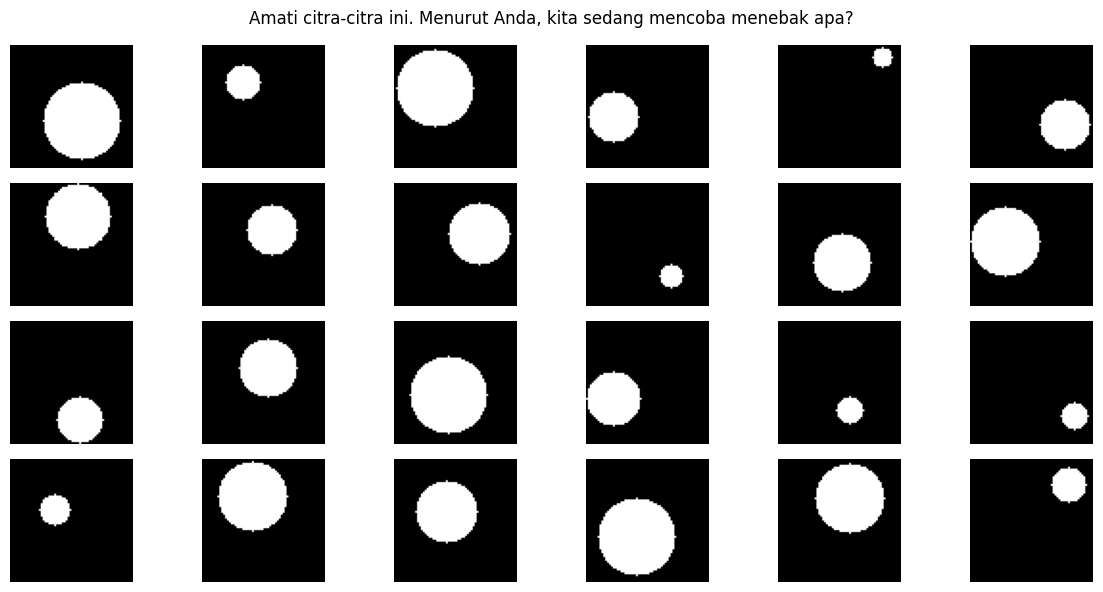

In [ ]:
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]

# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()


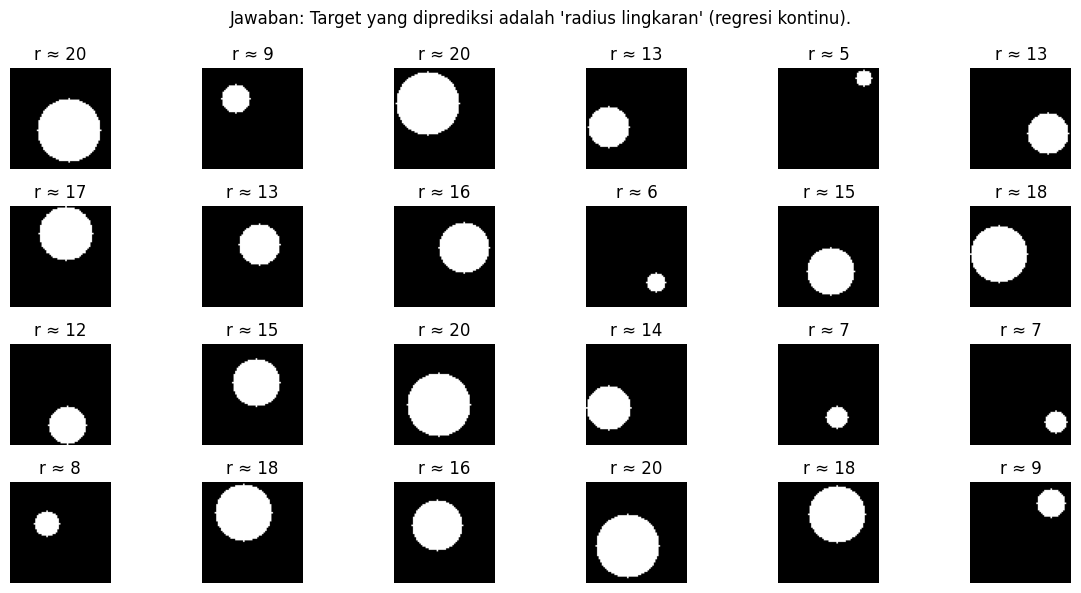

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r ≈ {int(rads[i])}")
    plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [ ]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64, 64, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output regresi
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred) ** 2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
MAE=0.960 | RMSE=1.208 | R2=0.930


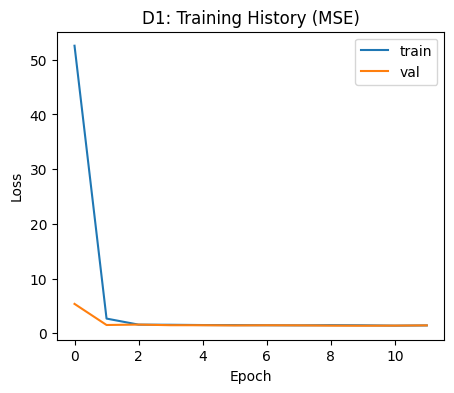

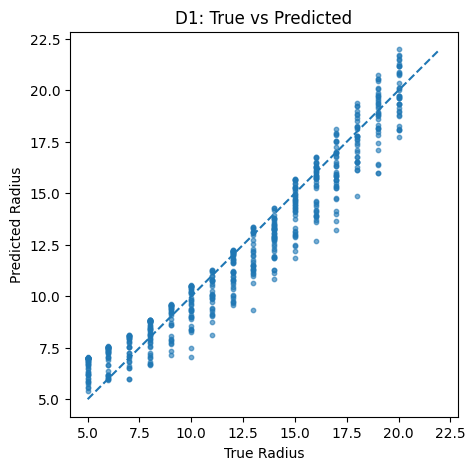

In [ ]:
# Plot loss
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5, 5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius")
plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

##Tantangan Mini

###1.Mengubah Rentang Radius

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_image_with_circle(img_size=64, radius_range=(8, 28)):
    """Membuat citra dengan lingkaran acak di dalamnya."""
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    r = np.random.randint(radius_range[0], radius_range[1])
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, 255, -1)
    return img, (r, cx, cy)

# Generate dataset dengan radius baru
X, y = [], []
for _ in range(5000):
    img, (r, cx, cy) = create_image_with_circle(radius_range=(8, 28)) # Radius diubah di sini
    X.append(img)
    y.append(r) # Asumsi sementara hanya prediksi radius

X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan dan latih ulang model Anda di sini (contoh model sederhana)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1) # Output untuk radius
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluasi
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 49.2480 - val_loss: 0.3482
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3132 - val_loss: 0.2551
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2301 - val_loss: 0.2499
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1934 - val_loss: 0.1711
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1437 - val_loss: 0.1280
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0934 - val_loss: 0.1169
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0818 - val_loss: 0.0702
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0460 - val_loss: 0.0546
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0348 - val_loss: 0.0551
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0310 - val_loss: 0.0389
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
MAE: 0.12898044288158417
RMSE: 0.1760610420006212
R2 Score: 0.9989812970161438


###2.Menambahkan Noise pada Citra

In [ ]:
import albumentations as A

def add_noise(image):
    """Fungsi untuk menambahkan noise Gaussian dan blur."""
    transform = A.Compose([
        A.OneOf([
            A.GaussianBlur(blur_limit=(3, 7), p=0.5),
            A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        ], p=1.0)
    ])
    return transform(image=image)['image']

# Contoh aplikasi noise pada satu gambar
img_example, _ = create_image_with_circle()
img_noisy = add_noise(img_example)

# Untuk dataset, terapkan fungsi ini saat augmentasi data
# ... (lakukan di dalam data generator atau sebelum melatih model)

/tmp/ipython-input-3397681289.py:8: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),


###3.Tugas Multi-Output

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Pastikan fungsi ini mengembalikan tuple (r, cx, cy)
def create_image_with_circle(img_size=64, radius_range=(5, 25)):
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    r = np.random.randint(radius_range[0], radius_range[1])
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, 255, -1)
    return img, (r, cx, cy)

# -- Bagian Paling Penting --
# Pastikan Anda memasukkan tuple (r, cx, cy) ke dalam list y
X, y = [], []
for _ in range(5000):
    img, params = create_image_with_circle()
    X.append(img)
    y.append(params) # 'params' harus berisi (r, cx, cy)

# Konversi ke NumPy array
X = np.array(X).reshape(-1, 64, 64, 1) / 255.0
y = np.array(y) # Ini akan membuat array dengan shape (5000, 3)

# -- Verifikasi Shape Sebelum Melatih Model --
print(f"Shape dari X: {X.shape}")
print(f"Shape dari y: {y.shape}") # <-- HARUS (5000, 3)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape dari X_train: {X_train.shape}")
print(f"Shape dari y_train: {y_train.shape}") # <-- HARUS (4000, 3)
print(f"Shape dari y_test: {y_test.shape}")   # <-- HARUS (1000, 3)


# -- Modifikasi Model untuk Multi-Output --
# Menggunakan Input layer eksplisit adalah praktik terbaik
model_multi = Sequential([
    Input(shape=(64, 64, 1)), # Praktik terbaik untuk mendefinisikan input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3) # Output layer dengan 3 neuron untuk [r, cx, cy]
])

model_multi.compile(optimizer='adam', loss='mse') # MSE cocok untuk regresi multi-output

print("\nMemulai pelatihan model multi-output...")
model_multi.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=32)

# -- Evaluasi --
print("\nEvaluasi Model:")
y_pred_multi = model_multi.predict(X_test)

# Metrik evaluasi yang cocok
mae_per_output = np.mean(np.abs(y_test - y_pred_multi), axis=0)
print(f"MAE untuk [radius, center_x, center_y]: {mae_per_output}")

total_mae = mean_absolute_error(y_test, y_pred_multi)
print(f"MAE Gabungan: {total_mae:.4f}")

Shape dari X: (5000, 64, 64, 1)
Shape dari y: (5000, 3)

Shape dari X_train: (4000, 64, 64, 1)
Shape dari y_train: (4000, 3)
Shape dari y_test: (1000, 3)

Memulai pelatihan model multi-output...
Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 196.3814 - val_loss: 10.9164
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.9507 - val_loss: 4.1668
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0901 - val_loss: 2.1201
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2343 - val_loss: 1.3594
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7433 - val_loss: 1.0007
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4658 - val_loss: 0.8041
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3310 - val_loss: 0.6630
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1922 - val_loss: 0.6398
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1810 - val_loss: 0.5562
Epoch 10/15
100/100 ━━━━━━━━

#D2

##Praktikum

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"abyanfazanariswangga","key":"a748ac9d4ed1f87f1a69bbe3327b02fa"}'}

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
replace /content/utk/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/utk/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/utk/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/utk/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y
✅ Dataset UTKFace berhasil diekstrak.


Total gambar ditemukan: 23708


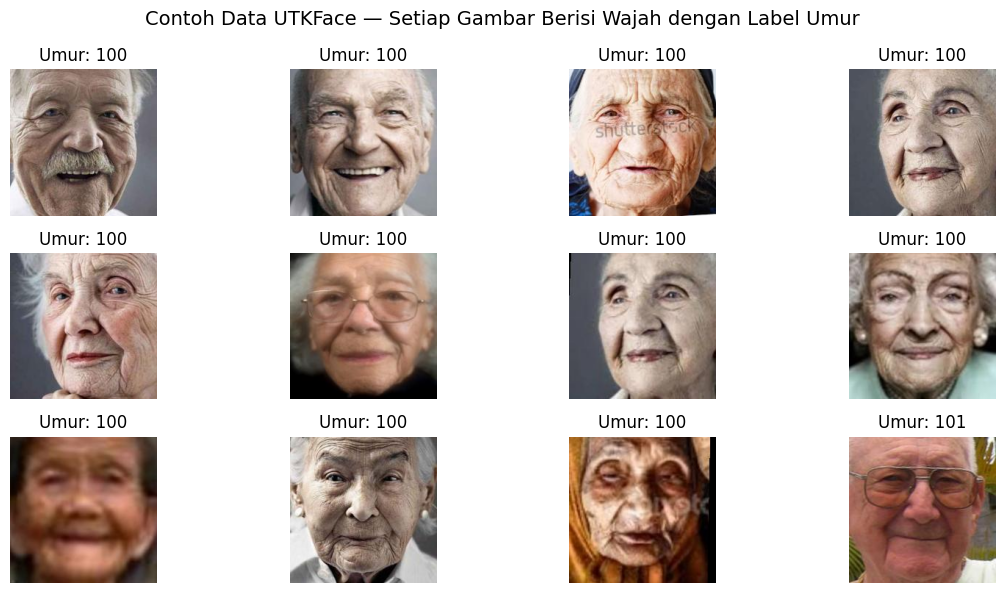

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])
ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(files, ages, test_size=0.2, random_state=42)
IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label
train_ds = tf.data.Dataset.from_tensor_slices((train_files,
y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files,
y_test)).map(load_img).batch(64)
print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")
# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
  include_top=False,
  input_shape=(IMG_SIZE, IMG_SIZE, 3),
  weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone
# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)
# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])
model.summary()

Hardware: GPU


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_4 (Multiply)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - loss: 340.0792 - mae: 13.5340 - val_loss: 159.7775 - val_mae: 9.6206 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 156.0297 - mae: 9.2529 - val_loss: 146.5280 - val_mae: 9.1100 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 144.4734 - mae: 8.8817 - val_loss: 140.7779 - val_mae: 8.8038 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 140.7147 - mae: 8.7021 - val_loss: 137.8243 - val_mae: 8.6656 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 137.6034 - mae: 8.5905 - val_loss: 136.2223 - val_mae: 8.5830 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - loss: 137.1561 - mae: 8.5469 - val_loss: 137.1937 - val_mae: 8.6818 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - loss: 135.0057 - mae: 8.4979 - val_loss: 136.3254 - val

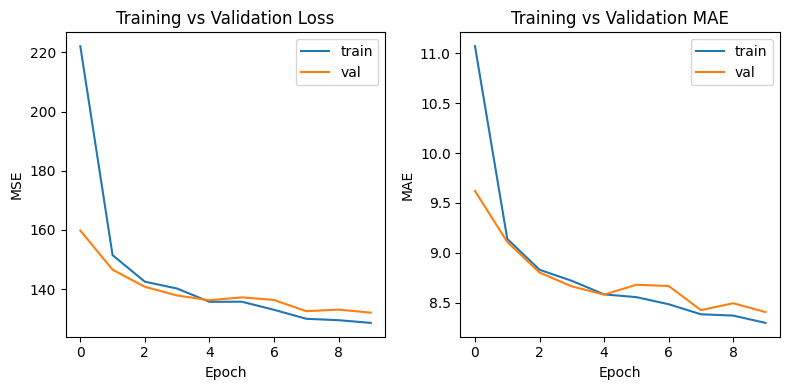

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
  tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True,monitor='val_loss'),

tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')
]
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=10,
  callbacks=cb,
  verbose=1
)
# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 51s 112ms/step - loss: 188.8005 - mae: 10.1126 - val_loss: 157.0184 - val_mae: 9.1076 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 78.4090 - mae: 6.5652 - val_loss: 124.6421 - val_mae: 8.0520 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 60ms/step - loss: 53.0972 - mae: 5.4469 - val_loss: 109.5081 - val_mae: 7.6476 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 38.3829 - mae: 4.6749 - val_loss: 103.9209 - val_mae: 7.4114 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 29.8998 - mae: 4.1137 - val_loss: 99.5804 - val_mae: 7.2971 - learning_rate: 1.0000e-04


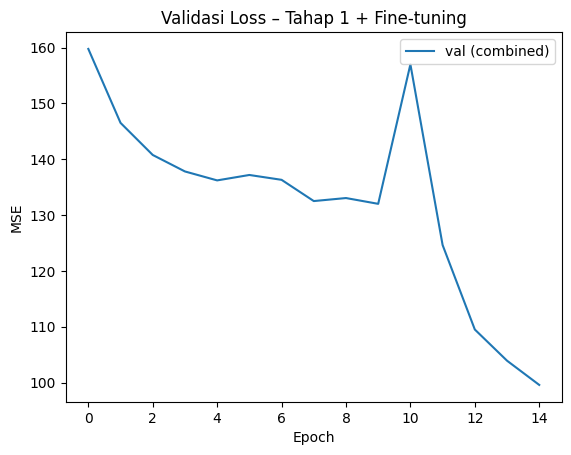

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False  # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mse',
    metrics=['mae']
)

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

MAE = 7.30 tahun
RMSE = 9.98 tahun
R2 = 0.749


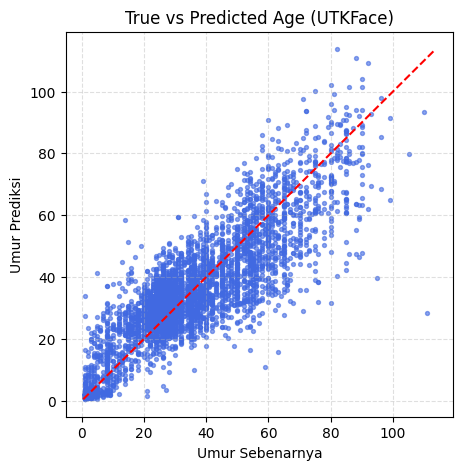

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred) ** 2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R2 = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

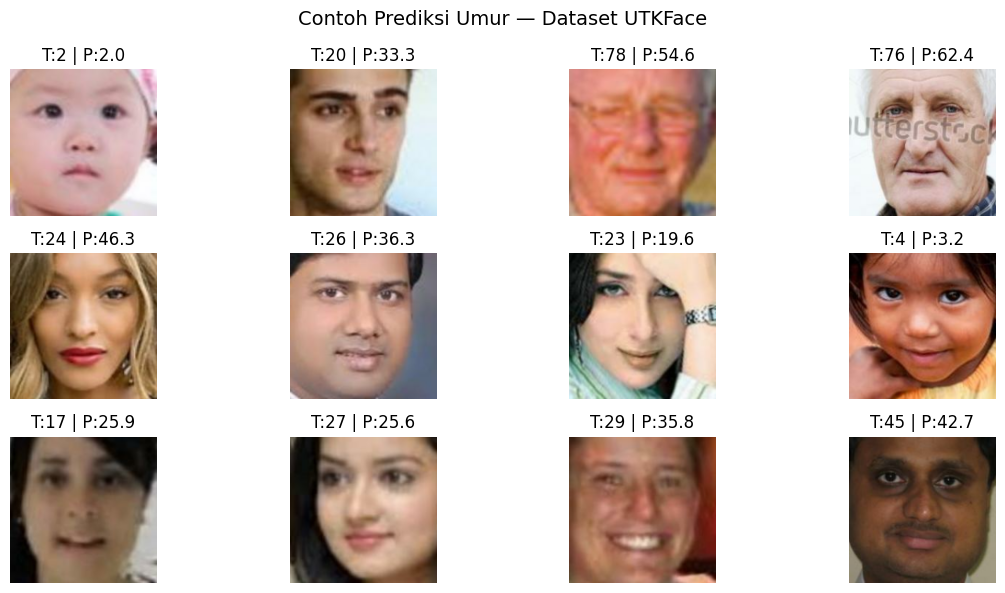

In [ ]:
import random

sample_paths = random.sample(test_files, 12)
plt.figure(figsize=(12, 6))
for i, path in enumerate(sample_paths):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    true_age = int(os.path.basename(path).split('_')[0])
    pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
    plt.subplot(3, 4, i + 1)
    plt.imshow(img.numpy())
    plt.title(f"T:{true_age} | P:{pred_age:.1f}")
    plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

##Tantangan Mini

###1.Menambahkan Augmentasi Ekstra

Model dikompilasi ulang dengan AdamW dan ExponentialDecay LR.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_4 (Multiply)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 1,690,497 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 49s 108ms/step - loss: 38.6829 - mae: 4.5877 - val_loss: 158.6063 - val_mae: 8.9076
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 31.8565 - mae: 4.0939 - val_loss: 105.0063 - val_mae: 7.3144
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 23.7549 - mae: 3.5908 - val_loss: 103.1975 - val_mae: 7.2109
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - loss: 17.6888 - mae: 3.1561 - val_loss: 96.8251 - val_mae: 7.0045
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - loss: 16.2789 - mae: 3.0367 - val_loss: 83.9231 - val_mae: 6.5637
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 15.0286 - mae: 2.8985 - val_loss: 88.0056 - val_mae: 6.8307
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - loss: 14.2096 - mae: 2.8207 - val_loss: 87.3889 - val_mae: 6.7733
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 13.0250 - mae: 2.7004 - val_loss: 92.8846 - val_mae: 7.0338


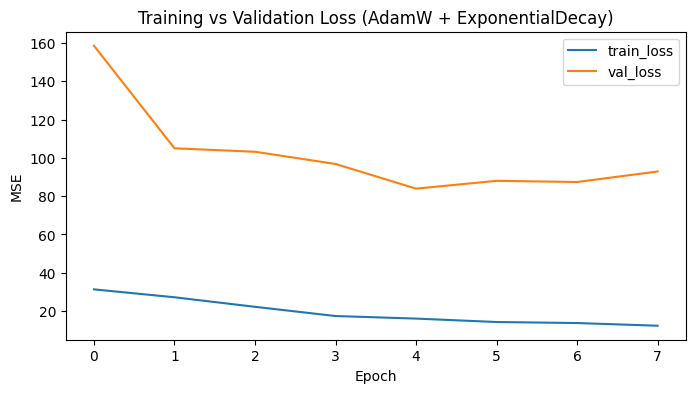

In [ ]:
import tensorflow as tf

# --- 1. Definisikan Jadwal Learning Rate Baru ---

initial_learning_rate = 1e-4

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(

    initial_learning_rate,

    decay_steps=len(train_ds) * 2, # Turunkan setiap 2 epoch

    decay_rate=0.9, # Turunkan sebesar 10%

    staircase=True)

# --- 2. Kompilasi Ulang Model dengan Optimizer dan LR Schedule Baru ---

# Kita reset bobot model ke keadaan setelah pre-training (sebelum fine-tuning)

# Note: Jika Anda ingin melanjutkan dari model teraugmentasi, lewati langkah ini

# model.load_weights('initial_finetune_weights.h5') # Asumsikan Anda menyimpan bobot sebelumnya

model.compile(

    optimizer=tf.keras.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=1e-5),

    loss='mse',

    metrics=['mae']

)

print("Model dikompilasi ulang dengan AdamW dan ExponentialDecay LR.")

model.summary()

# --- 3. Latih Ulang Model ---

history_new_opt = model.fit(

    train_ds, # Gunakan dataset original atau augmentasi

    validation_data=test_ds,

    epochs=10,

    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)], # Hanya EarlyStopping

    verbose=1

)

# --- 4. Visualisasi untuk Melihat Stabilitas ---

plt.figure(figsize=(8, 4))

plt.plot(history_new_opt.history['loss'], label='train_loss')

plt.plot(history_new_opt.history['val_loss'], label='val_loss')

plt.title('Training vs Validation Loss (AdamW + ExponentialDecay)')

plt.xlabel('Epoch'); plt.ylabel('MSE')

plt.legend()

plt.show()

###2.Mengubah Learning Rate Scheduler atau Optimizer

Model dikompilasi ulang dengan AdamW dan ExponentialDecay LR.


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_4 (Multiply)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 1,690,497 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 47s 103ms/step - loss: 13.2839 - mae: 2.7378 - val_loss: 94.1583 - val_mae: 7.2036
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 19.5952 - mae: 3.2107 - val_loss: 119.1788 - val_mae: 8.1958
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 17.5342 - mae: 3.0861 - val_loss: 145.5816 - val_mae: 9.1523
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 14.6424 - mae: 2.8678 - val_loss: 103.2083 - val_mae: 7.4081


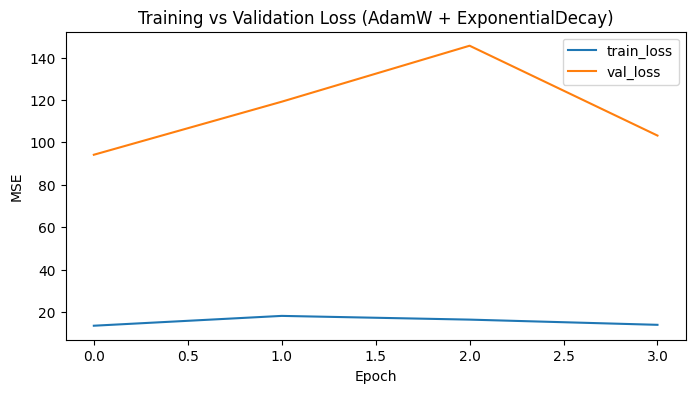

In [ ]:
import tensorflow as tf
# --- 1. Definisikan Jadwal Learning Rate Baru ---
initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=len(train_ds) * 2, # Turunkan setiap 2 epoch
    decay_rate=0.9, # Turunkan sebesar 10%
    staircase=True)

# --- 2. Kompilasi Ulang Model dengan Optimizer dan LR Schedule Baru ---
# Kita reset bobot model ke keadaan setelah pre-training (sebelum fine-tuning)
# Note: Jika Anda ingin melanjutkan dari model teraugmentasi, lewati langkah ini
# model.load_weights('initial_finetune_weights.h5') # Asumsikan Anda menyimpan bobot sebelumnya

model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=lr_schedule, weight_decay=1e-5),
    loss='mse',
    metrics=['mae']
)

print("Model dikompilasi ulang dengan AdamW dan ExponentialDecay LR.")
model.summary()


# --- 3. Latih Ulang Model ---
history_new_opt = model.fit(
    train_ds, # Gunakan dataset original atau augmentasi
    validation_data=test_ds,
    epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)], # Hanya EarlyStopping
    verbose=1
)


# --- 4. Visualisasi untuk Melihat Stabilitas ---
plt.figure(figsize=(8, 4))
plt.plot(history_new_opt.history['loss'], label='train_loss')
plt.plot(history_new_opt.history['val_loss'], label='val_loss')
plt.title('Training vs Validation Loss (AdamW + ExponentialDecay)')
plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.legend()
plt.show()

###3.Memisahkan Dataset per Kelompok Umur

MAE per Kelompok Umur:
Kelompok Umur       MAE
         0-10  4.477719
        11-20  9.629199
        21-30  6.190697
        31-40  6.479230
        41-50  8.270388
        51-60  9.593663
        61-80  9.622501
          80+ 10.446719


/tmp/ipython-input-1802455782.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_per_group = df.groupby('age_group')['absolute_error'].mean().reset_index()


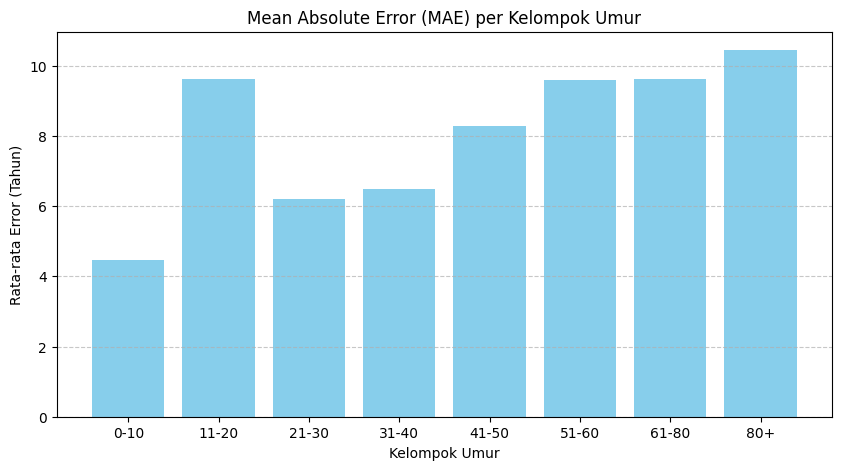

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Buat Prediksi untuk Seluruh Test Set (jika belum) ---
# Gunakan y_pred dan y_test dari evaluasi model terbaik Anda
y_pred_final = np.concatenate([model.predict(batch[0], verbose=0).ravel() for batch in test_ds])

# --- 2. Buat DataFrame untuk Analisis ---
df = pd.DataFrame({'true_age': y_test, 'predicted_age': y_pred_final})
df['absolute_error'] = (df['true_age'] - df['predicted_age']).abs()

# --- 3. Buat Kelompok Umur ---
bins = [0, 10, 20, 30, 40, 50, 60, 80, 120]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-80', '80+']
df['age_group'] = pd.cut(df['true_age'], bins=bins, labels=labels, right=False)

# --- 4. Hitung MAE per Kelompok ---
mae_per_group = df.groupby('age_group')['absolute_error'].mean().reset_index()
mae_per_group.columns = ['Kelompok Umur', 'MAE']

print("MAE per Kelompok Umur:")
print(mae_per_group.to_string(index=False))

# --- 5. Visualisasi Error ---
plt.figure(figsize=(10, 5))
plt.bar(mae_per_group['Kelompok Umur'], mae_per_group['MAE'], color='skyblue')
plt.title('Mean Absolute Error (MAE) per Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Rata-rata Error (Tahun)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###4.Uji Model pada Wajah Sendiri

Saving 46.jpg to 46 (4).jpg
User uploaded file "46 (4).jpg" with length 116324 bytes


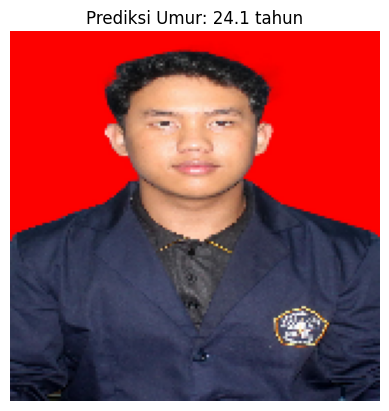

Model memprediksi umur Anda sekitar 24.1 tahun.


In [ ]:
from google.colab import files
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Upload Gambar Anda ---
uploaded = files.upload()

# Ambil nama file yang diupload
for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')
  path = fn
  break # Hanya proses satu gambar

# --- 2. Preprocess Gambar Sesuai Input Model ---
img = tf.io.read_file(path)
img = tf.image.decode_image(img, channels=3) # decode_image lebih fleksibel (jpg, png, dll)
img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
img_for_pred = img / 255.0 # Normalisasi
img_for_pred = tf.expand_dims(img_for_pred, 0) # Tambah dimensi batch -> (1, 160, 160, 3)

# --- 3. Lakukan Prediksi ---
predicted_age = model.predict(img_for_pred, verbose=0).ravel()[0]

# --- 4. Tampilkan Hasil ---
plt.imshow(img.numpy().astype("uint8"))
plt.title(f"Prediksi Umur: {predicted_age:.1f} tahun")
plt.axis('off')
plt.show()

print(f"Model memprediksi umur Anda sekitar {predicted_age:.1f} tahun.")

#D3

##Praktikum

In [ ]:
from google.colab import files
files.upload() # pilih kaggle.json dari komputer Anda
import os, shutil
if os.path.exists("kaggle.json"):
  os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
  shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
  os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
  !pip -q install kaggle
  print("✅ Kaggle API siap digunakan.")
else:
  print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle (1).json
✅ Kaggle API siap digunakan.


In [ ]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

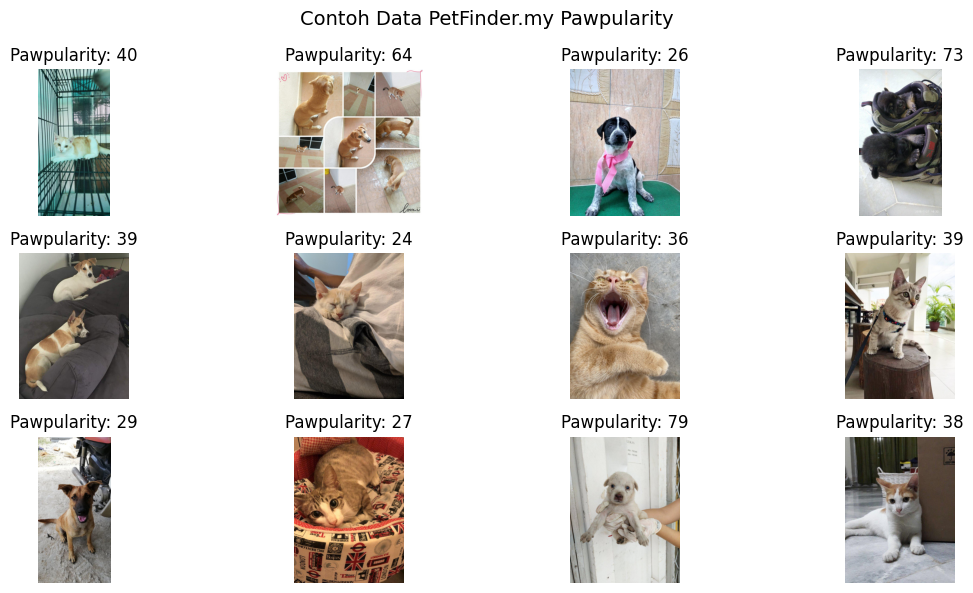

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())

# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
    img = Image.open(row.path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pawpularity: {row.Pawpularity}")
    plt.axis('off')
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(64).prefetch(tf.data.AUTOTUNE)

print(f"Dataset siap digunakan — {len(train_df)} untuk training, {len(val_df)} untuk validasi.")

Dataset siap digunakan — 7929 untuk training, 1983 untuk validasi.


In [ ]:
from tensorflow.keras import layers, models

base = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False  # freeze sementara

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_1 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
cb = [
  tf.keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True),
  tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]
history = model.fit(train_ds, validation_data=val_ds, epochs=10,
callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 119s 517ms/step - loss: 816.7011 - mae: 21.4520 - val_loss: 472.1686 - val_mae: 16.0028 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 198ms/step - loss: 421.9214 - mae: 15.1675 - val_loss: 423.2775 - val_mae: 15.1010 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 232ms/step - loss: 387.6957 - mae: 14.4202 - val_loss: 404.8570 - val_mae: 14.8845 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 38s 207ms/step - loss: 362.5219 - mae: 14.1081 - val_loss: 389.2574 - val_mae: 14.5161 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 45s 238ms/step - loss: 361.6964 - mae: 14.2567 - val_loss: 380.3960 - val_mae: 14.2799 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - loss: 349.5779 - mae: 13.9020 - val_loss: 374.6046 - val_mae: 14.0493 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 201ms/step - loss: 340.5305 - mae: 13.6922 - val_

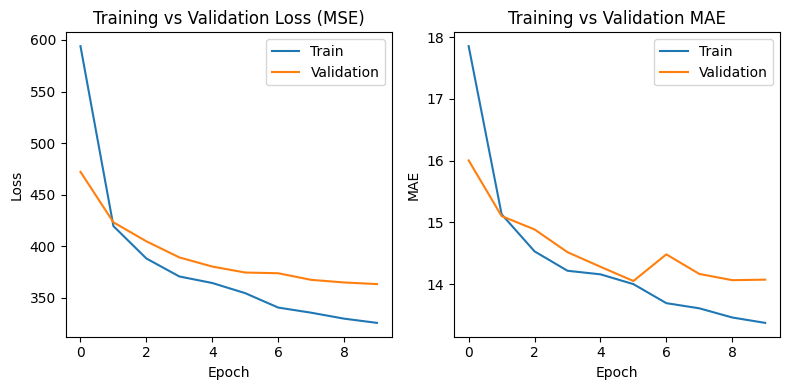

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

MAE = 14.07
RMSE = 19.06
R2 = 0.178


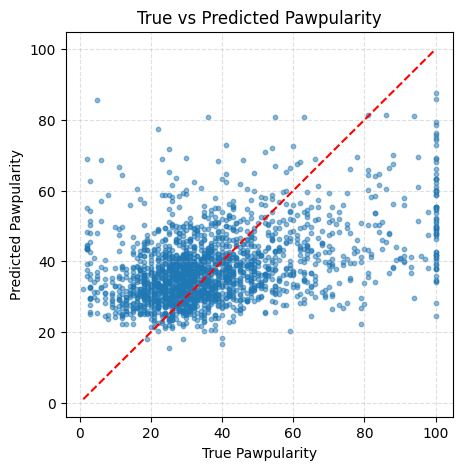

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for
batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R2 = {r2:.3f}")

# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

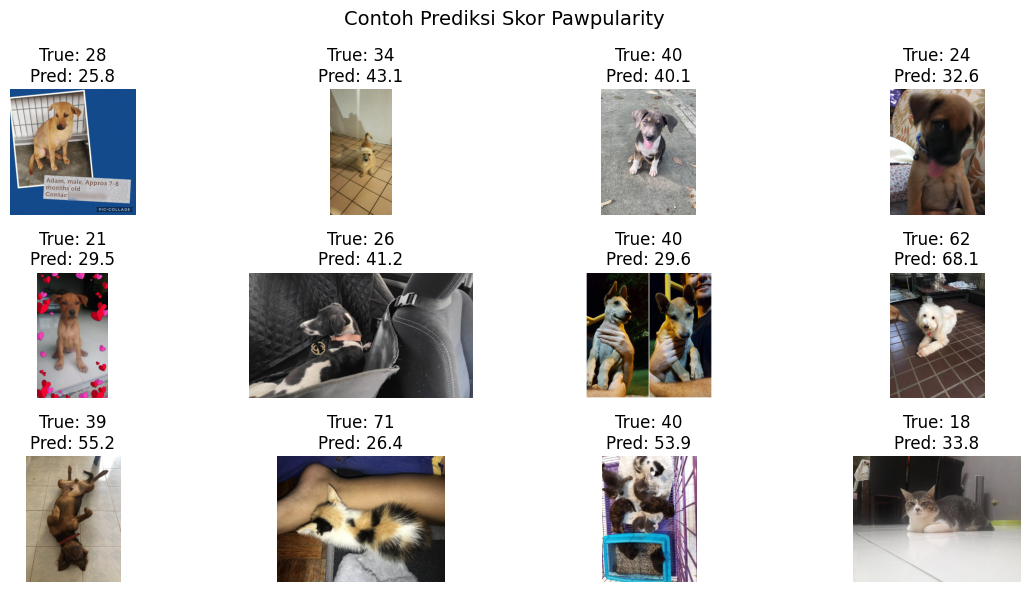

In [ ]:
import random
from PIL import Image

sample_rows = val_df.sample(12, random_state=1)

plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
  img = Image.open(row.path)
  pred = model.predict(tf.expand_dims(load_image(row.path,
row.Pawpularity)[0], 0), verbose=0).ravel()[0]
  plt.subplot(3,4,i+1)
  plt.imshow(img)
  plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
  plt.axis('off')
plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

##Tantangan Mini

###1.Menambahkan Data Augmentation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, r2_score

# Pastikan variabel val_df, val_ds, train_df, load_image, IMG_SIZE sudah ada dari D3 utama
def augment_image(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.2)
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_saturation(img, lower=0.8, upper=1.2)
    img = tf.image.resize_with_crop_or_pad(img, IMG_SIZE + 20, IMG_SIZE + 20)
    img = tf.image.random_crop(img, size=[IMG_SIZE, IMG_SIZE, 3])
    return img, label

train_aug = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity']))\
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)\
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

# Gunakan model EfficientNetB0 seperti sebelumnya
base_aug = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet')
base_aug.trainable = False

inputs = tf.keras.Input((IMG_SIZE,IMG_SIZE,3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base_aug(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_aug = tf.keras.Model(inputs, outputs)
model_aug.compile(optimizer='adam', loss='mse', metrics=['mae'])

cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history_aug = model_aug.fit(train_aug, validation_data=val_ds, epochs=10, callbacks=cb, verbose=1)

# Evaluasi
y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model_aug.predict(batch[0], verbose=0).ravel() for batch in val_ds])
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)
print(f"(Augmented) MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 97s 466ms/step - loss: 807.0234 - mae: 21.6085 - val_loss: 484.5477 - val_mae: 16.1541 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 267ms/step - loss: 443.6797 - mae: 15.6180 - val_loss: 432.9321 - val_mae: 15.2833 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 235ms/step - loss: 392.2967 - mae: 14.5957 - val_loss: 414.6184 - val_mae: 14.7528 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - loss: 394.2842 - mae: 14.7560 - val_loss: 396.0085 - val_mae: 14.4827 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 271ms/step - loss: 376.5855 - mae: 14.3546 - val_loss: 384.0941 - val_mae: 14.3217 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 75s 220ms/step - loss: 367.9093 - mae: 14.1640 - val_loss: 382.7314 - val_mae: 14.6495 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 88s 272ms/step - loss: 361.9488 - mae: 14.1164 - val_l

###2.Menggunakan EfficientNetB3 atau ResNet50

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Define IMG_SIZE here
IMG_SIZE = 224

# Load and split the data
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the load_image function
def load_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.cast(label, tf.float32)

# Create the datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'], train_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'], val_df['Pawpularity'])) \
    .map(load_image, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(64).prefetch(tf.data.AUTOTUNE)


# Gunakan model lebih besar: EfficientNetB3
base_b3 = tf.keras.applications.EfficientNetB3(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_b3.trainable = False

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base_b3(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_b3 = tf.keras.Model(inputs, outputs)
model_b3.compile(optimizer='adam', loss='mse', metrics=['mae'])

cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5)
]

history_b3 = model_b3.fit(train_ds, validation_data=val_ds, epochs=8, callbacks=cb, verbose=1)

# Evaluasi performa model
y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred_b3 = np.concatenate([model_b3.predict(batch[0], verbose=0).ravel() for batch in val_ds])
mae = mean_absolute_error(y_true, y_pred_b3)
rmse = np.sqrt(np.mean((y_true - y_pred_b3)**2))
r2 = r2_score(y_true, y_pred_b3)
print(f"(EfficientNetB3) MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 147s 708ms/step - loss: 904.5222 - mae: 22.7760 - val_loss: 489.3807 - val_mae: 16.1108 - learning_rate: 0.0010
Epoch 2/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 238ms/step - loss: 453.5669 - mae: 15.6825 - val_loss: 417.3455 - val_mae: 14.9274 - learning_rate: 0.0010
Epoch 3/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 83s 250ms/step - loss: 379.1719 - mae: 14.4634 - val_loss: 392.6351 - val_mae: 14.5833 - learning_rate: 0.0010
Epoch 4/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 284ms/step - loss: 374.7137 - mae: 14.3786 - val_loss: 377.2240 - val_mae: 14.3530 - learning_rate: 0.0010
Epoch 5/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 51s 295ms/step - loss: 352.7838 - mae: 14.0070 - val_loss: 371.6268 - val_mae: 14.1525 - learning_rate: 0.0010
Epoch 6/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 284ms/step - loss: 341.6006 - mae: 13.8640 - val_loss: 366.6882 - val_mae: 14.0874 - learning_rate: 0.0010
Epoch 7/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 50s 273ms

###3.Eksperimen Bias Anjing vs Kucing

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle

# Gunakan model terbaik yang sudah dilatih
model_to_use = (
    model_b3 if 'model_b3' in globals()
    else model_aug if 'model_aug' in globals()
    else model
)

# Bagi subset validasi menjadi dua kelompok simulasi
val_paths = np.array(val_df['path'])
val_paths = shuffle(val_paths, random_state=42)
half = len(val_paths) // 2
dog_files = val_paths[:half]
cat_files = val_paths[half:]

def load_predict_list(paths, model):
    imgs = []
    for p in paths:
        img = tf.io.read_file(p)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
        img = tf.cast(img, tf.float32) / 255.0
        imgs.append(img)
    imgs = tf.stack(imgs)
    preds = model.predict(imgs, verbose=0).ravel()
    return preds

# Prediksi dua kelompok simulasi
dog_preds = load_predict_list(dog_files[:200], model_to_use)
cat_preds = load_predict_list(cat_files[:200], model_to_use)

# Analisis rata-rata skor prediksi
dog_mean = np.mean(dog_preds)
cat_mean = np.mean(cat_preds)

print("Analisis Rata-rata Skor:")
print(f"Kelompok 1 ('Dog' simulasi) rata-rata prediksi = {dog_mean:.2f}")
print(f"Kelompok 2 ('Cat' simulasi) rata-rata prediksi = {cat_mean:.2f}")

if dog_mean > cat_mean:
    print("=> Model memberi skor lebih tinggi ke kelompok 1 (anjing simulasi).")
elif cat_mean > dog_mean:
    print("=> Model memberi skor lebih tinggi ke kelompok 2 (kucing simulasi).")
else:
    print("=> Model seimbang antara kedua kelompok.")

# Analisis akurasi (MAE per kelompok)
val_df['species'] = np.random.choice(['dog', 'cat'], size=len(val_df))
y_pred = np.concatenate([
    model_to_use.predict(batch[0], verbose=0).ravel() for batch in val_ds
])
val_df['predicted_pawpularity'] = y_pred

dogs_df = val_df[val_df['species'] == 'dog']
cats_df = val_df[val_df['species'] == 'cat']

if not dogs_df.empty and not cats_df.empty:
    mae_dogs = mean_absolute_error(dogs_df['Pawpularity'], dogs_df['predicted_pawpularity'])
    mae_cats = mean_absolute_error(cats_df['Pawpularity'], cats_df['predicted_pawpularity'])

    print("\nAnalisis Akurasi (MAE per kelompok):")
    print(f"MAE untuk Anjing: {mae_dogs:.3f}")
    print(f"MAE untuk Kucing: {mae_cats:.3f}")

    if abs(mae_dogs - mae_cats) > 1.0:
        print("Model menunjukkan potensi bias performa.")
        if mae_dogs < mae_cats:
            print("=> Model lebih akurat untuk foto anjing.")
        else:
            print("=> Model lebih akurat untuk foto kucing.")
    else:
        print("=> Performa model relatif seimbang antara anjing dan kucing.")
else:
    print("=> Tidak cukup data untuk membandingkan performa anjing vs kucing.")

Analisis Rata-rata Skor:
Kelompok 1 ('Dog' simulasi) rata-rata prediksi = 39.22
Kelompok 2 ('Cat' simulasi) rata-rata prediksi = 38.05
=> Model memberi skor lebih tinggi ke kelompok 1 (anjing simulasi).

Analisis Akurasi (MAE per kelompok):
MAE untuk Anjing: 13.785
MAE untuk Kucing: 14.163
=> Performa model relatif seimbang antara anjing dan kucing.


###4.Menambahkan Fitur Non-Visual

In [ ]:
import cv2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Hitung tingkat kecerahan (brightness rata-rata) untuk setiap gambar
def calc_brightness(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.mean(gray)

brightness_vals = np.array([calc_brightness(p) for p in val_df['path']])

# Prediksi dari model CNN (gunakan model terakhir yang dilatih)
cnn_preds = np.concatenate([model_to_use.predict(batch[0], verbose=0).ravel() for batch in val_ds])
true_vals = val_df['Pawpularity'].values

# Gabungkan hasil CNN dan brightness dalam model regresi linear
X = np.column_stack([cnn_preds, brightness_vals])
reg = LinearRegression().fit(X, true_vals)
pred_final = reg.predict(X)

# Evaluasi hasil kombinasi
mae = mean_absolute_error(true_vals, pred_final)
rmse = np.sqrt(np.mean((true_vals - pred_final)**2))
r2 = r2_score(true_vals, pred_final)

print(f"(CNN + Brightness) MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")

(CNN + Brightness) MAE=13.94 | RMSE=18.88 | R²=0.193


#Penugasan

##3.

Upload foto wajah kamu (jpg/png):


Saving 46.jpg to 46.jpg
Pakai model_aug


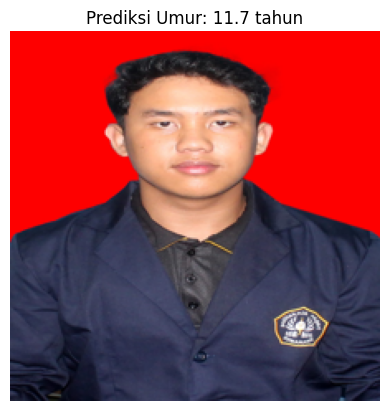

In [ ]:
# Penugasan 3: Prediksi Umur (foto pribadi)
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

print("Upload foto wajah kamu (jpg/png):")
data = files.upload()

# pilih model yang udah dilatih
try:
  modelku = model_aug
  print("Pakai model_aug")
except:
  try:
    modelku = model
    print("Pakai model default")
  except:
    raise Exception("Model belum dilatih! Jalankan D2 dulu.")

for f in data.keys():
  img = Image.open(f).convert('RGB')
  img = img.resize((IMG_SIZE, IMG_SIZE))
  arr = np.array(img) / 255.0
  arr = np.expand_dims(arr, 0)

  pred = modelku.predict(arr, verbose=0)[0][0]
  plt.imshow(img)
  plt.title(f"Prediksi Umur: {pred:.1f} tahun")
  plt.axis('off')
  plt.show()

##4.

Upload foto hewan kamu (anjing/kucing):


Saving kucing.jpeg to kucing.jpeg
Pakai EfficientNetB3


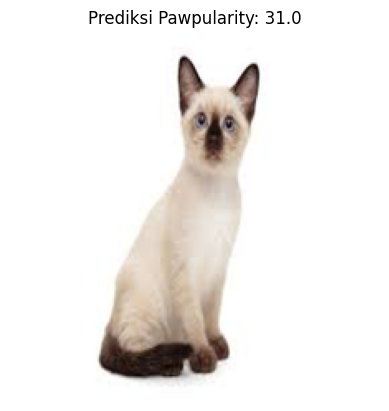

In [ ]:
# Penugasan 4: Prediksi Pawpularity (foto hewan)
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

print("Upload foto hewan kamu (anjing/kucing):")
data = files.upload()

# pilih model mana aja yang ada
if 'model_b3' in globals():
  modelnya = model_b3
  print("Pakai EfficientNetB3")
elif 'model_aug' in globals():
  modelnya = model_aug
  print("Pakai model_aug")
else:
  modelnya = model
  print("Pakai model default (mungkin kurang akurat)")

for f in data.keys():
  img = Image.open(f).convert('RGB')
  img = img.resize((IMG_SIZE, IMG_SIZE))
  arr = np.array(img).astype(np.float32) / 255.0
  arr = np.expand_dims(arr, axis=0)

  skor = modelnya.predict(arr, verbose=0)[0][0]
  plt.imshow(img)
  plt.title(f"Prediksi Pawpularity: {skor:.1f}")
  plt.axis('off')
  plt.show()